## Pengenalan Matplotlib dan Persiapan Dataset

### Apa dan Kenapa Matplotlib

Dalam menganalisa data, sering kali menggunakan visualisasi data untuk memahami karakteristik maupun trend di dalam data yang dimiliki. 

Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah **matplotlib**.

Dalam modul ini, akan dijelaskan beberapa hal yang dapat dilakukan dengan matplotlib. Di antaranya:

    - Pengolahan dataset (menggunakan library NumPy & Pandas).
    - Membuat grafik dasar menggunakan matplotlib.
    - Melakukan modifikasi komponen visualisasi, seperti axis, labels, title, dan legend.
    - Menyimpan plot visualisasi yang sudah dibuat

## Pengenalan Dataset

Datanya ada di file 'https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'



In [57]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

print('Ukuran dataset : %d baris dan %d kolom \n' %dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset : 5000 baris dan 9 kolom 

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


## Penjelasan Dataset

“Berikut ini tampilan data transaksi supermarket kita sepanjang tahun 2019, lengkap dengan masing-masing penjelasannya untuk tiap kolom. Bisa kita simak bersama untuk pertimbangan strategi kita ke depan,”

Aku dan teman-teman di ruangan rapat sibuk menyimak penjelasan ini:

    order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
    order_date : tanggal terjadinya transaksi
    customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
    city : kota tempat toko terjadinya transaksi
    province : provinsi (berdasarkan city)
    product_id : ID dari suatu product yang dibeli
    brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
    quantity : Kuantitas/banyaknya product yang dibeli
    item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli

“Jika penjelasan data barusan sudah dapat dicerna, saya akan menampilkan **Gross Merchandise Value** atau total uang yang dibayarkan customer. Aksara tolong tampilkan grafiknya pada layar.”

### Penambahan Kolom Order Month pada Dataset

Untuk membuat grafik GMV bulanan, bayangan kita tentu adalah sebuah line chart dengan sumbu-x berupa bulan, dan sumbu-y adalah total GMV di bulan tersebut

Aku tahu kalau aku dan Andra belum punya kolom **bulan**, baru ada **order_date** yang merupakan tanggal transaksi. Tapi, tidak masalah. Aku bisa membuat kolom baru **order_month** dengan kode seperti ini:

In [58]:
import datetime

dataset['order_month'] = dataset['order_date'].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())


   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


#### Penjelasasn code :

Ada beberapa function yang berperan di sini:

    - apply & lambda biasa digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja

    - Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
    
    - Function strftime digunakan untuk mengubah format suatu data bertipe datetime, dalam hal ini diubah menjadi '%Y-%m', yang berarti output-nya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada.

In [53]:
# dataset['order_date'].apply(lambda x:x[:7]) == dataset['order_month']

# cara membuat order_month bisa juga dengan menggunakan teknik slicing
dataset['order_date'].apply(lambda x:x[:7])



0       2019-10
1       2019-10
2       2019-11
3       2019-08
4       2019-10
         ...   
4995    2019-12
4996    2019-07
4997    2019-10
4998    2019-10
4999    2019-11
Name: order_date, Length: 5000, dtype: object

### Penambahan Kolom GMV pada Dataset

Selanjutnya, bagaimana dengan **GMV**? Definisikan **GMV** adalah perkalian setiap entri di kolom **item_price** dan kolom **quantity**. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom yang disebutkan secara langsung.

In [59]:
dataset['GMV'] = dataset['item_price'] * dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom \n' %dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom 

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      GMV  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


### Membuat Data Agregat

Hasil rapat tadi mendorong divisiku untuk menampilkan plot grafik data agar lebih nyaman dilihat secara visual. Aku ingin mencoba untuk mengeksekusinya.

“Aksara, seperti yang kamu dengar juga tadi, kita perlu menampilkan datanya dalam bentuk grafik,” ujar Andra seakan tahu isi hatiku.

“Serahkan saja padaku, Ndra! Aku akan coba bikin plot grafiknya,” aku mengajukan diri.

“Baik. Kamu bisa minta tolong Senja dulu untuk menjelaskan jika ada kendala, karena hari ini saya tidak sepenuhnya di kantor.”

“Oke.” Dalam hati aku bersorak girang, sudah kangen sekali dengan Senja! Tapi sebelum itu, aku mencoba untuk mengerjakan sendiri dulu beberapa susunan kode grafiknya menggunakan matplotlib:

In [64]:
monthly_amount = dataset.groupby('order_month')['GMV'].sum().reset_index()
print(type(monthly_amount))
print(monthly_amount)

<class 'pandas.core.frame.DataFrame'>
  order_month         GMV
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


In [28]:
monthly = dataset['GMV'].groupby([dataset['order_month']]).sum().reset_index()

# teknik yang sama dengan monthly_amount 

### Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV

Cara standar untuk menggunakan matplotlib yaitu dengan memanggil function _plt.plot_ lalu definisikan nilai di sumbu-x dan sumbu-y. Dalam hal ini, definisikan kolom **order_month** di sumbu-x (parameter pertama), dan kolom **gmv** di sumbu-y (parameter kedua). Setelah selesai mendefinisikan komponen chart-nya, lalu panggil _plt.show()_ untuk menampilkan grafiknya.

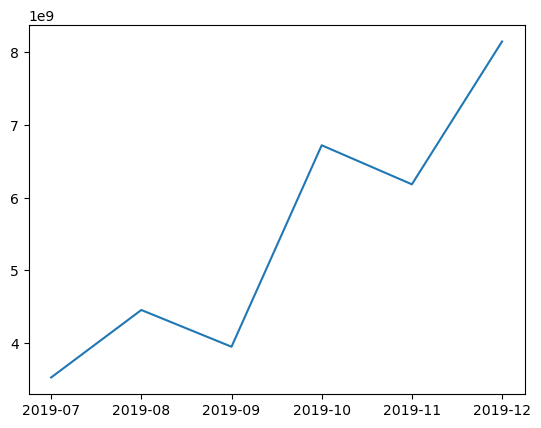

In [27]:
import matplotlib.pyplot as plt 

plt.plot(monthly_amount['order_month'], monthly_amount['GMV'])
plt.show()

### Cara Alternatif: Fungsi .plot() pada pandas Dataframe

Dengan pendekatan lain, dimungkinkan juga melakukan visualisasi dengan matplotlib tanpa membuat variabel baru.

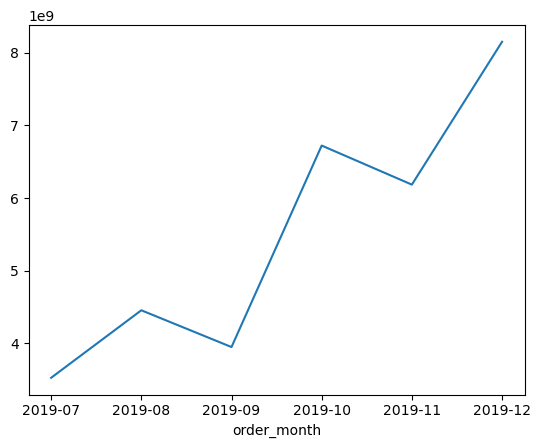

In [30]:
dataset.groupby(['order_month'])['GMV'].sum().plot()
plt.show()

## Kesimpulan

Dua cara untuk membuat plot menggunakan matplotlib:

    1. Kita dapat menggunakan fungsi plt.plot() dari library matplotlib.pyplot as plt
    2. atau dengan menggunakan fungsi .plot() langsung dari variabel dataframe, yaitu dataset pada kasus kita sebelumnya. 

Dengan grafik yang sudah aku buat ini saja, sudah bisa melihat trend dan insight-nya. Untuk analisis cepat, grafik seperti ini terkadang sudah cukup.

Tapi untuk presentasi ke atasan, tentu kita harus membuat grafik yang lebih ‘cantik’.


# Kustomisasi Grafik - Part 1

## Anatomi dari Figure

“Karena saya lihat kamu cukup antusias belajar visualisasi data, saya mau share insight baru. Ini tentang kustomisasi grafik. Saya pikir ini akan membantumu mengerjakan grafik dari data hasil rapat tadi.”

“Sebelum mulai kustomisasi, ada baiknya kita pahami dulu anatomi dari sebuah Figure di maplotlib. Bisa dilihat sesuai di gambar berikut,”
berisi contoh gambar:

<img src="anatomi_figure.jpg" style = "width : 500 px; height : 500px">

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.

    - Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
    - Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
    - Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:
        - Axis Label: Nama dari sumbu yang ditampilkan.
        - Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
        - Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
    - Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot/histogram).
    - Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.
 

Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html.

### Mengubah Figure Size

Untuk mengubah ukuran grafik.  Bisa dengan mengubah ukuran figure-nya. 
Caranya, sebelum mulai membuat plot, kita tambahkan kode berikut sebelum melakukan plotting grafik

    plt.figure(figsize=(15,5))

Dalam contoh ini, ukuran Figure telah diubah agar memiliki panjang 15 inch, dan lebar 5 inch. Sehingga line chart-nya bisa memanjang ke kanan dan lebih mudah dilihat trend-nya.

 

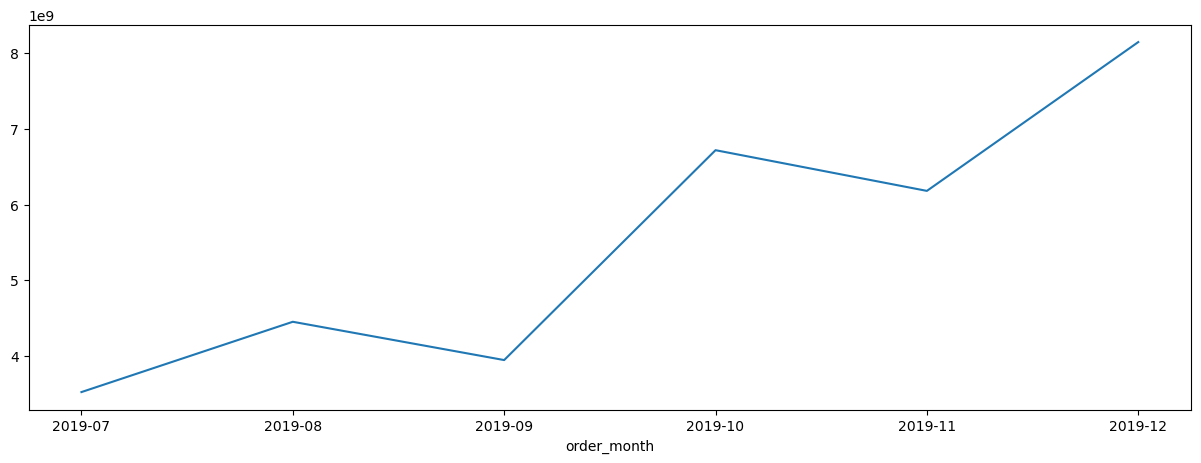

In [34]:
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['GMV'].sum().plot()
plt.show()

### Menambahkan Title and Axis Labels

“Kamu juga bisa menambahkan title dan axis labels”
Beberapa hal yang lazim dimodifikasi pada sebuah grafik adalah **judul (title)** dan label di sumbu-x & sumbu-y (axis labels).
 
Untuk menambahkannya, tinggal menambah 

    plt.title, plt.xlabel, dan plt.ylabel di code sebelum plt.show(), misalnya seperti ini:
    
    plt.title('Monthly GMV Year 2019')
    plt.xlabel('Order Month')
    plt.ylabel('Total GMV')

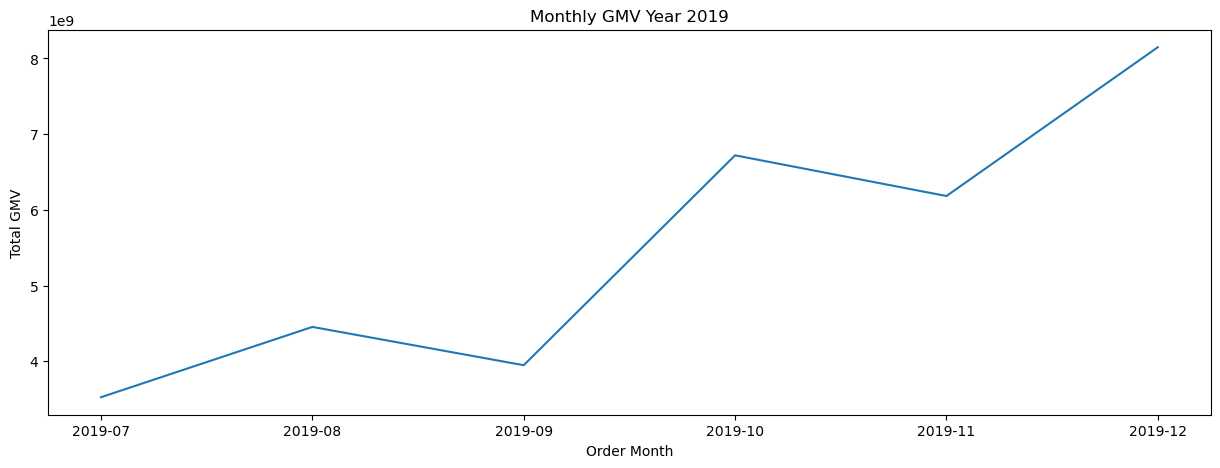

In [36]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

## Kustomisasi Title and Axis Labels

Kita bisa melakukan berbagai modifikasi dengan menambahkan parameter ke dalam function-nya, contohnya :

Misalnya, untuk judul/title, parameter yang bisa ditambahkan:

    - loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka default-nya title ada di tengah.
    - pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
    - fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
    - color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc. 

Mari modifikasi judul, xlabel, dan ylabel dengan parameter-parameter di atas, misalnya seperti ini:

    plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
    plt.xlabel('Order Month', fontsize=15)
    plt.ylabel('Total Amount', fontsize=15)

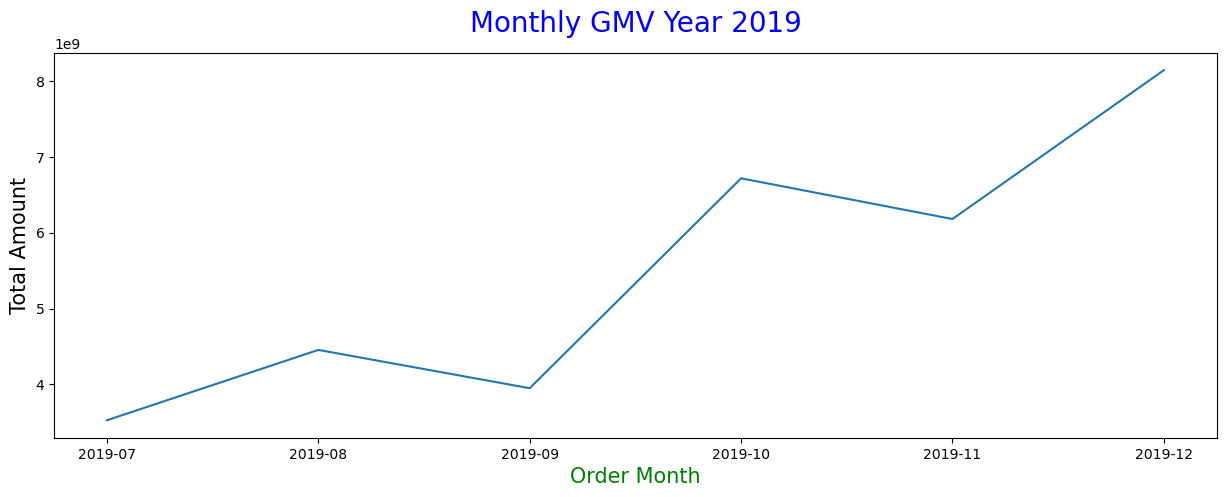

In [45]:

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=15, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15, color = "green")
plt.ylabel('Total Amount', fontsize=15)
plt.show()

## Kustomisasi Line dan Point

garis charts-nya enggak harus warna standar. Bisa kamu ganti, caranya :

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function **.plot()**. Beberapa parameter yang bisa dikustomisasi:

    - color: mengubah warnanya (sama seperti di title)
    - linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
    - linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
    - marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.
 
Misalnya ingin ubah grafiknya menjadi seperti ini:

    dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)

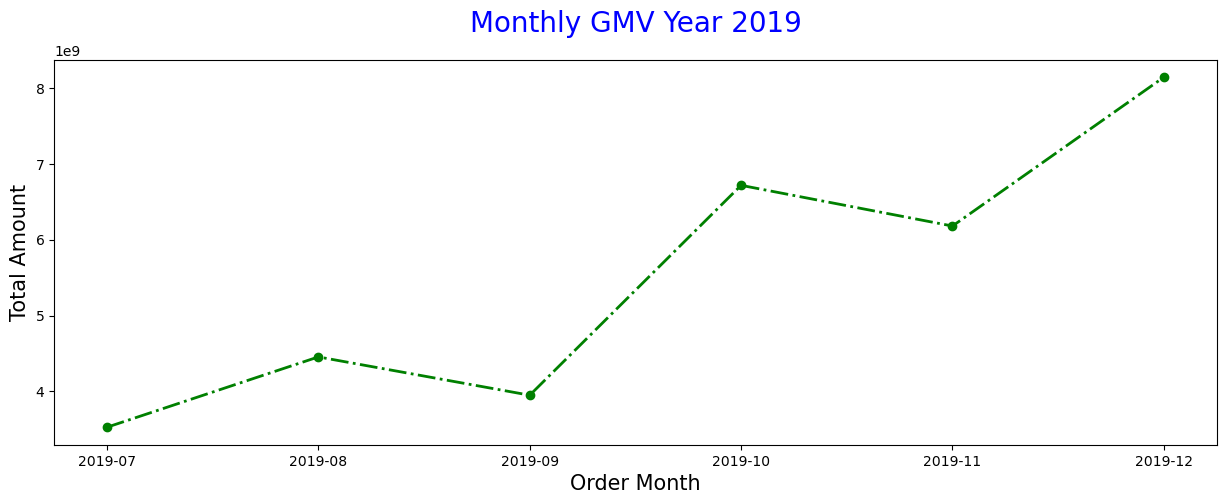

In [46]:

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

## Kustomisasi Grid

soal kustomisasi grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan _grid_.

Caranya dengan menambahkan _plt.grid()_ dengan parameter yang mirip dengan line. Contohnya di sini:

    plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

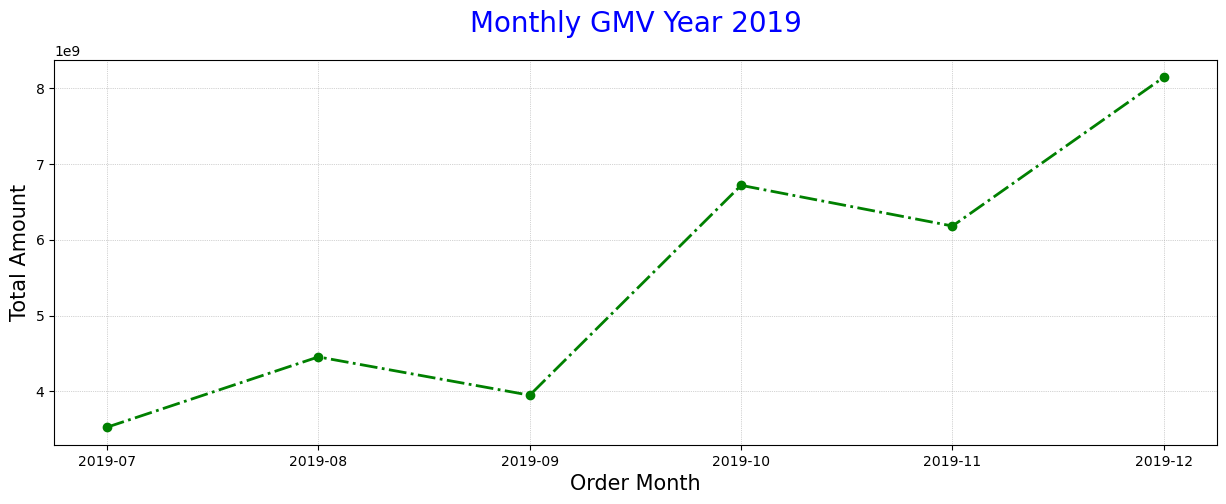

In [47]:

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

## Kustomisasi Axis Ticks

Nilai-nilai di sumbu x dan y bisa diakses melalui function _plt.xticks()_ dan _plt.yticks()_.

Untuk mengubah ticks di sumbu-y menjadi **miliar**, bisa menambahkan code sebagai berikut:

    labels, locations = plt.yticks()
    plt.yticks(labels, (labels/1000000000).astype(int))

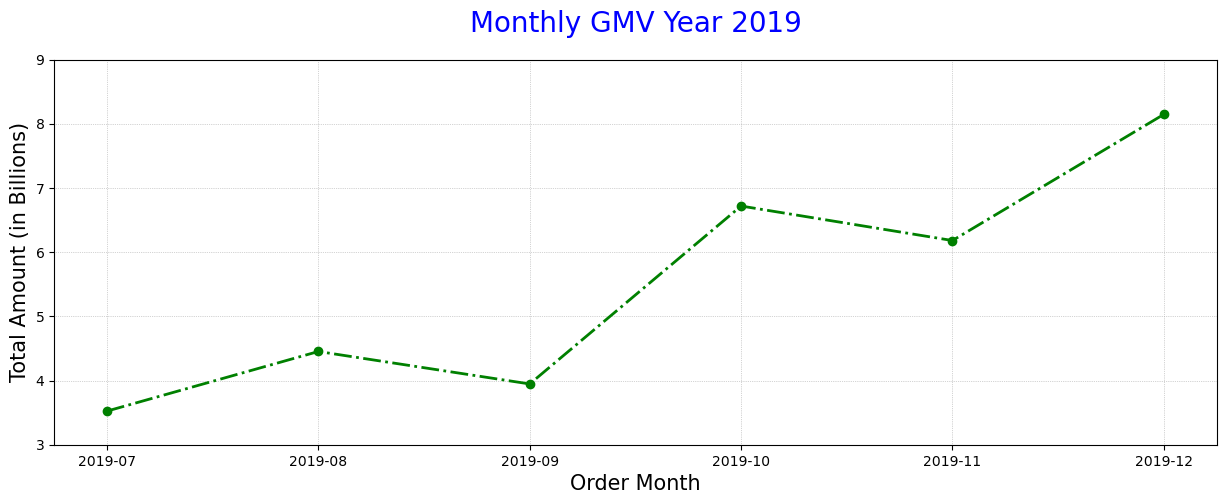

In [48]:

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

## Menentukan Batas Minimum dan Maksimum Axis Ticks

Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. 

Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan _plt.ylim(ymin=0)_ seperti ini:

    plt.ylim(ymin=0)

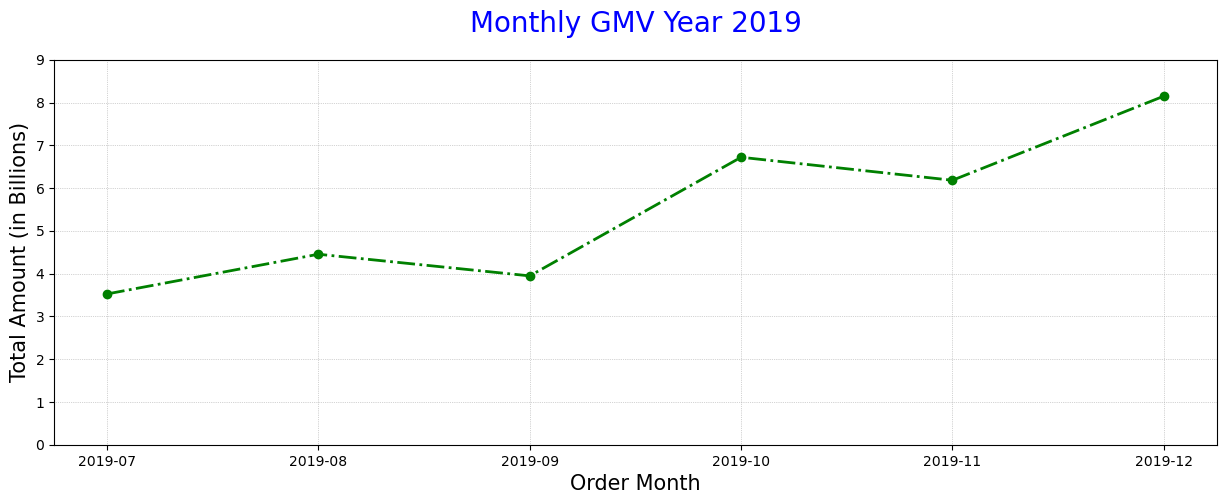

In [50]:

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

## Menambahkan Informasi Pada Plot

Berhubung grafiknya sudah jadi. Ada baiknya kita menambahkan beberapa informasi di dalamnya agar pembaca mendapatkan insight dari grafik tersebut.

Dilihat dari trend-nya, mulai bulan Oktober 2019, GMV kita naik drastis setelah sebelumnya stagnan di angka 200-300 miliar per bulan. 

Kita bisa mulai dengan menambahkan info ini di grafik. Caranya seperti ini :

Caranya dengan menambahkan _plt.text _seperti potongan kode program berikut ini:

    plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')

Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan **plt.text()**. Dua angka pertama itu adalah koordinat, **x dan y**. Saat **set transform=fig.transFigure**, maka koordinatnya berkisar **0 sampai 1** (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).

Jika parameter transform tidak diisi, maka koordinatnya dalam satuan inch (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.

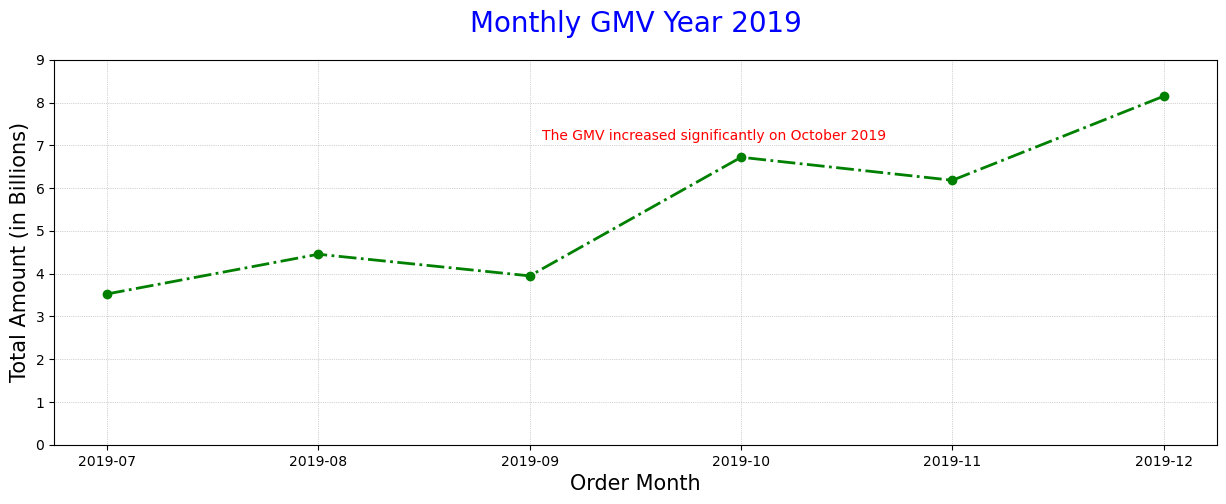

In [51]:

fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

## Menyimpan Hasil Plot Menjadi File Image

Untuk menyimpan sebagai file gambar, kalau mau cepat, bisa tinggal di-screenshoot saja. Tapi kalau ingin hasil yang bagus, ada trik tersendiri.
Kita bisa menyimpan sebagai file gambar dengan function savefig sebelum **plt.show()**, seperti ini:

    plt.savefig('monthly_gmv.png')

Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:

    plt.gcf().canvas.get_supported_filetypes()

dengan output-nya menunjukkan ke dalam tipe file apa saja dapat disimpan 

In [ ]:

fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['GMV'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

## Pengaturan Parameter untuk Menyimpan Gambar

kamu bisa atur juga resolusinya agar hasil gambarnya lebih berkualitas. Ini kamu inget deh beberapa parameternya. 

Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

    dpi: Resolusi gambar (dots per inch). 
    quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
    facecolor: Memberikan warna bagian depan figure, di luar area plot 
    edgecolor: Memberikan warna pinggiran gambar
    transparent: Jika nilainya True, maka gambarnya jadi transparan (jika file-nya png)
 

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

Jadi, coba disimpan dengan settingan-nya seperti ini ya:

    plt.savefig('monthly_gmv.png', quality=95)

Yang akan menghasilkan kualitas gambar yang tersimpan sebesar 95% dari awal.

In [ ]:

fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

## Mini Project

Coba buat sebuah line chart dengan menggunakan matplotlib yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

### Studi Kasus dari Senja: Daily number of customers on Desember

Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah _line chart_ dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

    1. Ukuran figure adalah 10x5
    2. Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
    3. Sumbu-y adalah jumlah unique customers di tiap tanggal
    4. Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

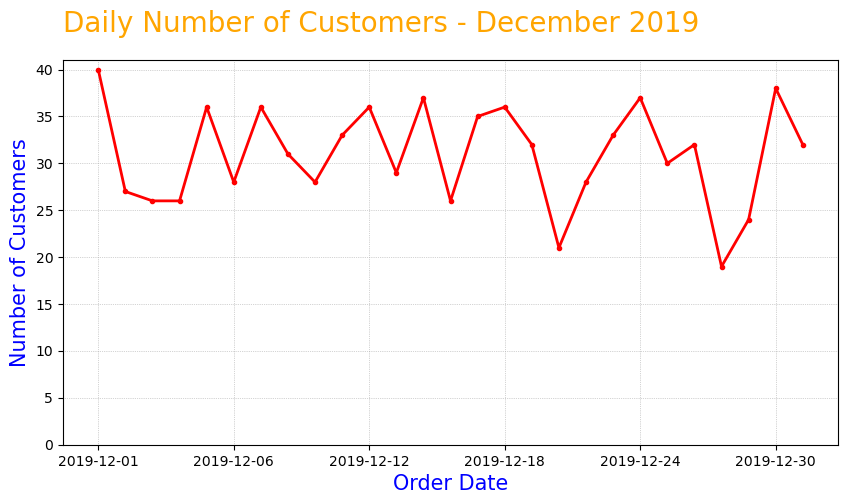

In [65]:
# Import library yang dibutuhkan
# import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month2'] = dataset['order_date'].apply(lambda x: x[:7])
dataset['order_month2']
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month2']=='2019-12'].groupby('order_date')['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

# Penutup/Kesimpulan

Akhirnya, aku telah selesai mempelajari dasar-dasar pembuatan chart menggunakan matplotlib. Catatan untukku sendiri adalah untuk membuat visualisasi, harus mempersiapkan dulu data yang dibutuhkan. Lalu membuat plot-nya. Selanjutnya, bisa kustomisasi berbagai komponen pada chart, seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya. Setelah selesai, tentunya bisa menyimpan gambarnya.

 

**Congratulations!** Aku berhasil menyelesaikan modul **Data Visualization with Python Matplotlib for Beginner - Part 1**. Berdasarkan materi-materi yang telah aku pelajari dan praktikkan dalam modul ini, aku sudah mendapatkan pengetahuan (knowledge) dan praktik (skill) yang diantaranya:

    1. mempersiapkan dulu data yang dibutuhkan,
    2. membuat plot dari data yang telah dipersiapkan,
    3. mengkustomisasi berbagai komponen di chart yang telah dibuat, seperti figure size, title/judul, axis labels, axis ticks, style dari line/points di chart, grid, teks, dan lain sebagainya,
    4. menyimpan gambar yang telah dibuat.
